# Exercício 03
## Seleção de variáveis
### Alunos:

- Francielle Alves Vargas, Nusp: 9527629


---

Nesse exercício utilizaremos um dataset para classificação binária. No total são 19 variáveis de entrada e 1 variável de saída. O dataset pode ser encontrado no arquivo "dataset_hepatitis.csv".

Existem valores faltantes nesse dataset, representados pelo caractere "?".

**Há material complementar disponível para resolução desse exercício. Acesse o arquivo "Transformações em dados heterogeneos" antes de prosseguir.**

### Questão 01.

Carregue o dataset (`pandas.read_csv`) e interprete os valores ausentes corretamente. Utilize o parâmetro `na_values`.

In [161]:
import pandas as pd
import numpy as np
dados_originais = pd.read_csv("dataset_hepatitis.csv", na_values=['?'])

#Apresenta informações do dataset e valores ausentes
#df.info()
#df.isnull()
print(dados_originais)

#Separando as features
X = df.iloc[:, :-1]
print(X)

#Separando a classe
Y = df.iloc[:,19]
print(Y)


     AGE     SEX STEROID ANTIVIRALS  ... ALBUMIN PROTIME HISTOLOGY Class
0     30    male      no         no  ...     4.0     NaN        no     1
1     50  female      no         no  ...     3.5     NaN        no     1
2     78  female     yes         no  ...     4.0     NaN        no     1
3     31  female     NaN        yes  ...     4.0    80.0        no     1
4     34  female     yes         no  ...     4.0     NaN        no     1
..   ...     ...     ...        ...  ...     ...     ...       ...   ...
150   46  female     yes         no  ...     3.3    50.0       yes     0
151   44  female     yes         no  ...     4.3     NaN       yes     1
152   61  female      no         no  ...     4.1     NaN       yes     1
153   53    male      no         no  ...     4.1    48.0       yes     1
154   43  female     yes         no  ...     3.1    42.0       yes     0

[155 rows x 20 columns]
     AGE     SEX STEROID ANTIVIRALS  ...   SGOT ALBUMIN PROTIME HISTOLOGY
0     30    male      no 



---

### Questão 02.

Nessa questão, você irá fazer o pré-processamento dos dados.

Você deve:


*   **Para os dados numéricos:** substitua os valores faltantes utilizando a estratégia de média (`sklearn.impute.SimpleImputer`). Depois padronize o intervalo dessas variáveis (`sklearn.preprocessing.StandardScaler`)
*   **Para os dados categóricos:** substitua os valores faltantes utilizando a estratégia de mais frequentes (`sklearn.impute.SimpleImputer`). Depois converta os dados categóricos para uma representação numérica (`sklearn.preprocessing.OneHotEncoder`),

Lembre-se de utilizar as classes `sklearn.pipeline.Pipeline` e `sklearn.compose.ColumnTransformer` conforme consta no material complementar. 

In [163]:
import pandas as pd 
import numpy as np 
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.impute import SimpleImputer

# Criamos um vetor com o nome das classes desejadas
features_numericos = ['AGE', 'BILIRUBIN', 'ALK_PHOSPHATE', 'SGOT', 'ALBUMIN', 'PROTIME']
features_categoricos = ['SEX', 'STEROID', 'ANTIVIRALS', 'FATIGUE', 'MALAISE', 'ANOREXIA', 'LIVER_BIG', 'LIVER_FIRM', 'SPLEEN_PALPABLE', 'SPIDERS', 'ASCITES', 'VARICES', 'HISTOLOGY']

pipeline_numerico = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())])

pipeline_categorico = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder())])

transformacao = ColumnTransformer(
    transformers=[
        ('transformacao numerica', pipeline_numerico, features_numericos),
        ('transformacao categorica', pipeline_categorico, features_categoricos),        
    ])

dados_transformados = transformacao.fit_transform(X)
dados_transformados.round(2)


array([[-0.89, -0.36, -0.44, ...,  0.  ,  1.  ,  0.  ],
       [ 0.7 , -0.45,  0.64, ...,  0.  ,  1.  ,  0.  ],
       [ 2.94, -0.61, -0.2 , ...,  0.  ,  1.  ,  0.  ],
       ...,
       [ 1.58, -0.53, -0.66, ...,  0.  ,  0.  ,  1.  ],
       [ 0.94,  0.06, -0.53, ...,  1.  ,  0.  ,  1.  ],
       [ 0.14, -0.19, -0.12, ...,  0.  ,  0.  ,  1.  ]])



---

### Questão 03.

Determine as 10 variáveis mais relevantes do conjunto (lembre-se de concatenar a variável alvo no dataset transformado). Você pode utilizar a matriz de covariância (`numpy.cov`), correlação (`pandas.DataFrame.corr`), `scatterplot`, etc. Justifique sua escolha.

Lembre-se que heatmaps (`seaborn.heatmap`) podem auxiliar a visualização.

24     5
25    12
26    30
27    14
28    28
29    24
30    26
31     4
32    32
33    33
Name: 33, dtype: int64


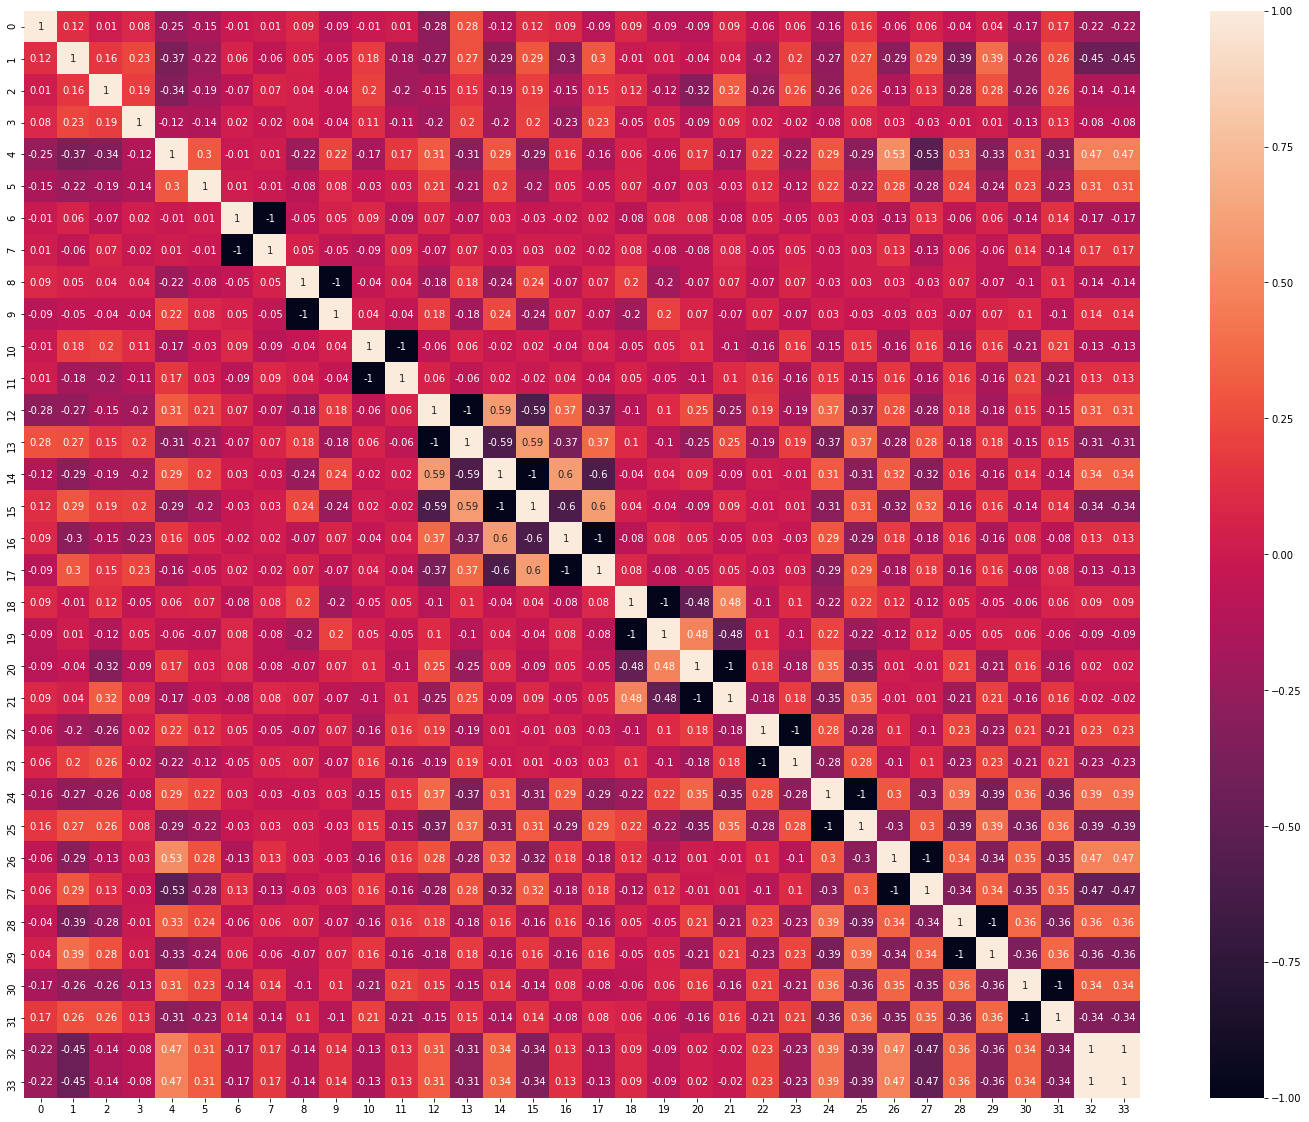

In [189]:
import seaborn as sns
import matplotlib.pyplot as plt

dados_transformados_com_classe = np.c_[dados_transformados, df.iloc[:, -1]]

data_t = pd.DataFrame(dados_transformados_com_classe)
correlation_matrix = data_t.corr(method="pearson").round(2)
sns.heatmap(data=correlation_matrix, annot=True)
plt.rcParams['figure.figsize'] = [25, 20]

#Selecionei as dez variáveis mais relevantes considerando como critério a seguinte escala:
#<0 Nenhuma relevância
#0-0,19 relevância pobre
#0,20-0,39 relevância leve
#0,40-0,59 relevância moderada
#0,60-0,79 relevância substancial
#0,80-1,00 relevância quase perfeita

#Extrai as 10 variáveis mais relevantes
correlacao_com_variavel_alvo = correlation_matrix.iloc[:,-1]
indice_10_variaveis = np.argpartition(correlacao_com_variavel_alvo, -10)[-10:]






---

### Questão 04.

Com as 10 varíaveis determinadas na questão anterior, crie um novo conjunto de dados.

Lembre-se que o numpy permite indexar colunas/linhas utilizando arrays.

In [191]:
#cria um novo conjunto de dados com as dez variáveis mais relevantes
data_10_variaveis = pd.DataFrame(indice_10_variaveis)
print(data_10_variaveis)


    33
24   5
25  12
26  30
27  14
28  28
29  24
30  26
31   4
32  32
33  33




---

### Questão 05.

Reduza a dimensionalidade do conjunto de dados criado utilizando a técnica PCA (`sklearn.decomposition.PCA`). Reduza a dimensionalidade de forma que no mínimo 80% da variância dos dados seja mantida (atente-se ao atributo  `explained_variance_ratio_`). Depois exiba os eixos principais.

In [205]:
from sklearn.decomposition import PCA

pca = PCA(n_components=5)
pca.fit(correlation_matrix)
X_pca = pca.transform(correlation_matrix)
print("Original shape:   ", correlation_matrix.shape)
print("Transformed shape:", X_pca.shape)
print(pca.explained_variance_)
print(pca.explained_variance_ratio_.sum())



Original shape:    (34, 34)
Transformed shape: (34, 5)
[1.88247018 0.40803839 0.30955368 0.14506757 0.12628799]
0.841975175344303




---

### Questão 06.

Teste um modelo de classificação (através da função `model_tester`) nos conjuntos criados nas questões 4 e 5. Houve redução expressiva da acurácia?

In [0]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
from sklearn.decomposition import PCA

# - Descrição:  Função que testa um modelo de classificação (MLP). 
# - Parâmetros: Variáveis de entrada (inputs) e a variável alvo (target).
# - Retorna:    Não retorna nenhum valor. Mas imprime a acurácia do modelo.
def model_tester(inputs, target):
  clf = MLPClassifier(hidden_layer_sizes=(5,), random_state=0, max_iter=10000)
  scores = cross_val_score(clf, inputs, target, cv=10)
  print("Score do classificador: %.2f" % (scores.mean()*100))


In [217]:
target = correlation_matrix.iloc[:,-1]

model_tester(X_pca, target)




Score do classificador: nan


/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: (array([ 0.47,  0.31, -0.17,  0.17, -0.14,  0.14, -0.13,  0.13,  0.31,
       -0.31,  0.34, -0.34,  0.13, -0.13,  0.09, -0.09,  0.02, -0.02,
        0.23, -0.23,  0.39, -0.39,  0.47, -0.47,  0.36, -0.36,  0.34,
       -0.34,  1.  ,  1.  ]),)

  FitFailedWarning)
/usr/local/lib/python3.6/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Unknown label type: (array([-0.22, -0.45, -0.14, -0.08, -0.14,  0.14, -0.13,  0.13,  0.31,
       -0.31,  0.34, -0.34,  0.13, -0.13,  0.09, -0.09,  0.02, -0.02,
        0.23, -0.23,  0.39, -0.39,  0.47, -0.47,  0.36, -0.36,  0.34,
       -0.34,  1.  ,  1.  ]),)

  Fi